<a href="https://colab.research.google.com/github/likit/Advanced-community-health-course/blob/main/comhealth_demo1_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv('2011-2012-health-data.csv')

In [6]:
dataset.count()/len(dataset)

ServiceNo      1.000000
ServiceDate    1.000000
CustID         0.999678
age            0.999678
sex            0.994047
cmsCode        0.960150
Weight         0.935318
Height         0.935586
HeartRate      0.910164
Systolic       0.871011
Diastolic      0.867257
BMI            0.960150
HDL            0.815017
TG             0.818128
UA             0.722767
dtype: float64

In [7]:
dataset.dtypes

ServiceNo        int64
ServiceDate     object
CustID         float64
age            float64
sex            float64
cmsCode        float64
Weight          object
Height          object
HeartRate       object
Systolic        object
Diastolic      float64
BMI             object
HDL             object
TG             float64
UA             float64
dtype: object

In [8]:
dataset.head()

,ServiceNo,ServiceDate,CustID,age,sex,cmsCode,Weight,Height,HeartRate,Systolic,Diastolic,BMI,HDL,TG,UA
0,201101050001,5/1/2011 0:00,225.0,59.0,2.0,38468.0,81.8,159,78,150,96.0,32.35631502,56.4,115.0,5.04
1,201101050002,5/1/2011 0:00,225.0,55.0,2.0,0.0,53.7,156,72,120,70.0,22.06607495,73.7,141.0,3.82
2,201101050003,5/1/2011 0:00,225.0,60.0,2.0,0.0,57.2,156,72,110,70.0,23.5042735,77.5,69.0,5.01
3,201101050004,5/1/2011 0:00,225.0,55.0,2.0,0.0,60,157,76,120,80.0,24.34175829,77.9,79.0,2.83
4,201101050005,5/1/2011 0:00,225.0,59.0,1.0,0.0,79.6,171.5,68,130,70.0,27.06355345,60.4,94.0,5.82


In [11]:
dataset = dataset.set_index('ServiceNo')

In [17]:
dataset.BMI = pd.to_numeric(dataset.BMI, errors='coerce')

In [18]:
dataset.dtypes

ServiceDate     object
CustID         float64
age            float64
sex            float64
cmsCode        float64
Weight          object
Height          object
HeartRate       object
Systolic        object
Diastolic      float64
BMI            float64
HDL             object
TG             float64
UA             float64
dtype: object

In [19]:
dataset.HDL = pd.to_numeric(dataset.HDL, errors='coerce')
dataset.Weight = pd.to_numeric(dataset.Weight, errors='coerce')
dataset.Height = pd.to_numeric(dataset.Height, errors='coerce')
dataset.Systolic = pd.to_numeric(dataset.Systolic, errors='coerce')
dataset.HeartRate = pd.to_numeric(dataset.HeartRate, errors='coerce')

In [20]:
dataset.count()/len(dataset)

ServiceDate    1.000000
CustID         0.999678
age            0.999678
sex            0.994047
cmsCode        0.960150
Weight         0.924913
Height         0.925449
HeartRate      0.865809
Systolic       0.867257
Diastolic      0.867257
BMI            0.924323
HDL            0.814964
TG             0.818128
UA             0.722767
dtype: float64

In [35]:
dataset = dataset.dropna(subset=['age',
                       'sex',
                       'Weight',
                       'Height',
                       'BMI',
                       'Systolic',
                       'Diastolic',
                       'HDL',
                       'TG',
                       'UA'
                       ])

array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='Systolic', ylabel='age'>,
        <Axes: xlabel='BMI', ylabel='age'>,
        <Axes: xlabel='HDL', ylabel='age'>,
        <Axes: xlabel='TG', ylabel='age'>,
        <Axes: xlabel='UA', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='Systolic'>,
        <Axes: xlabel='Systolic', ylabel='Systolic'>,
        <Axes: xlabel='BMI', ylabel='Systolic'>,
        <Axes: xlabel='HDL', ylabel='Systolic'>,
        <Axes: xlabel='TG', ylabel='Systolic'>,
        <Axes: xlabel='UA', ylabel='Systolic'>],
       [<Axes: xlabel='age', ylabel='BMI'>,
        <Axes: xlabel='Systolic', ylabel='BMI'>,
        <Axes: xlabel='BMI', ylabel='BMI'>,
        <Axes: xlabel='HDL', ylabel='BMI'>,
        <Axes: xlabel='TG', ylabel='BMI'>,
        <Axes: xlabel='UA', ylabel='BMI'>],
       [<Axes: xlabel='age', ylabel='HDL'>,
        <Axes: xlabel='Systolic', ylabel='HDL'>,
        <Axes: xlabel='BMI', ylabel='HDL'>,
        <Axes: xlabel='HDL', 

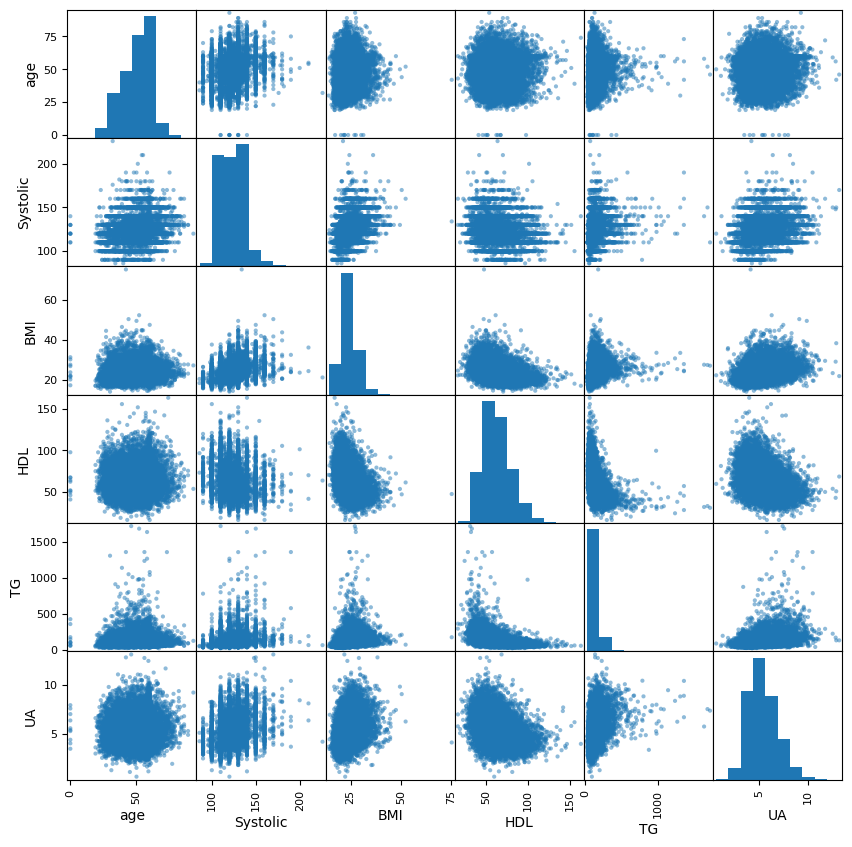

In [36]:
pd.plotting.scatter_matrix(
    dataset[['age', 'Systolic', 'BMI', 'HDL', 'TG', 'UA']],
    figsize=(10,10)
)

In [37]:
features = ['UA', 'age', 'BMI']
X = dataset.loc[:, features]

In [38]:
X.head()

,UA,age,BMI
ServiceNo,,,
201101050001,5.04,59.0,32.356315
201101050002,3.82,55.0,22.066075
201101050003,5.01,60.0,23.504274
201101050004,2.83,55.0,24.341758
201101050005,5.82,59.0,27.063553


In [39]:
y = dataset.Systolic

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [41]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1
)

In [42]:
lr = LinearRegression()

In [43]:
lr.fit(X_train, y_train)

LinearRegression()

In [44]:
lr.score(X_train, y_train)

0.24255359968648482

In [45]:
lr.score(X_test, y_test)

0.23795666077436028

In [46]:
lr.predict([[5.0, 42, 22.9]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([118.29505273])